## Purpose
<p> This notebook can use the models produced from "cnn_semantic.py" to demonstrate performance. </p>

In [1]:
from facet_ml.classification import cnn

from facet_ml.classification import cnn
import torch
from torch import nn
import numpy as np
from torchvision.models import resnet152
from pathlib import Path
import matplotlib.pyplot as plt

c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

# Load data
data_folder = (
    r"C:\Users\Jacob\Desktop\Academics\Mirkin\CC_Manuscript_Data\Training_Data_20240216\Coco_v5"
)
csv_path = r"C:\Users\Jacob\Desktop\Academics\CC_Manuscript_Data\2024_02_27_Processed.csv"
h5_path = r"C:\Users\Jacob\Desktop\Academics\CC_Manuscript_Data\Training_Data_20240216\2024_02_16_Training.h5"
dataloaders, datasizes = cnn.load_colloidal_datasets_coco(
    str(data_folder),
    num_workers=16,
    batch_size=2,
    mark_edges=True
)

cuda


In [3]:
model = cnn.SegUNet(3, 3)
model.load_state_dict(torch.load("cnn_semantic.pth"))

<All keys matched successfully>

In [4]:
test = dataloaders["train"]

images= []
masks = []

for img, mask in test:
    images.append(img)
    masks.append(mask)

torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
torch.Size([2,

torch.Size([1, 256, 256])
0
ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
2
ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
4
ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
6
ConvTranspose2d(128, 6

Text(0.5, 1.0, 'Semantic CNN')

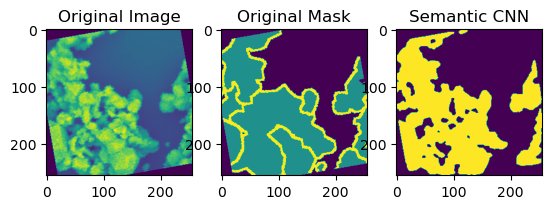

In [11]:
i = 1
fig, ax = plt.subplots(ncols=3)
# Original Image
ax[0].imshow(images[i][0][1])
ax[0].set_title("Original Image")

print(np.shape(masks[i][0]))
ax[1].imshow(masks[i][0][0])
ax[1].set_title("Original Mask")

# # Output Mask
output = model(images[i][0].unsqueeze(0)) # Get first image, load it as a (1, 3, 256, 256)
# _, preds = torch.max(output,1)
# print(np.shape(preds))
out_mask = torch.argmax(output,1).detach().numpy()[0]
import cv2

ax[2].imshow(out_mask)
ax[2].set_title("Semantic CNN")



In [6]:
np.shape(output[0][2])
np.where(output[0][2] > 0)
mod = np.moveaxis(np.array(output.detach().numpy()),1,-1)
for a in mod:
    for b in a:
        for c in b:
            if c[2] > 0:
                print(c)

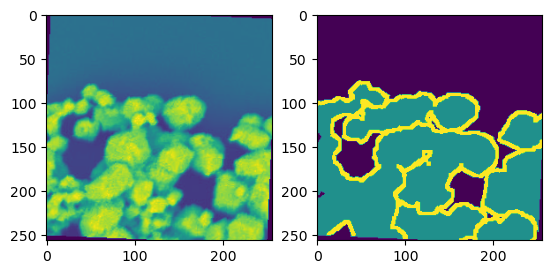

In [7]:
img, mask = test.dataset[1]
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img[0])
ax[1].imshow(mask[0])

In [8]:
np.unique(masks)

array([0, 1, 2], dtype=int64)

In [9]:
print(f"Mask Shapes : {np.shape(masks[i])}\nOutput shapes: {np.shape(output)}")

Mask Shapes : torch.Size([2, 1, 256, 256])
Output shapes: torch.Size([1, 3, 256, 256])


In [10]:
i=2
output = model(images[i][0].unsqueeze(0))
np.unique(images), np.unique(output.detach().numpy()[0][0])

0
ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
2
ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
4
ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2)) SegDoubleConv(
  (conv): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
)
6
ConvTranspose2d(128, 64, kernel_size=(2, 2), str

(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
        0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
        0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
        0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
        0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
        0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
        0.27450982, 0.2784314 , 0.28235295, 0.28